# Graphes finis

**Librairies**

In [ ]:
from graphviz import Digraph, Graph
import numpy as np

### Graphe non orienté

Un graphe non orienté est un ensemble de sommets reliés entre eux par des arêtes.

- Deux sommets reliés par une arête sont appelés adjacents.

- L’ordre d’un graphe correspond au nombre total de sommets qu’il contient.

- Le degré d’un sommet est le nombre d’arêtes qui le relient à d'autres sommets.

- Un graphe est dit complet lorsque chaque sommet est adjacent à tous les autres.

In [ ]:
dot = Graph()

# Add nodes
dot.node('A')
dot.node('B')
dot.node('C')
dot.node('D')
dot.node('E')

# Add edges (with loops and directions)
dot.edge('A', 'D')
dot.edge('A', 'B')
dot.edge('B', 'C')
dot.edge('D', 'E')

# ordre : 5, degré de A : 2, graphe non-complet
dot

In [ ]:
dot = Graph()

# Add nodes
dot.node('A')
dot.node('B')
dot.node('C')
dot.node('D')

# Add edges (with loops and directions)
dot.edge('A', 'B')
dot.edge('A', 'C')
dot.edge('A', 'D')
dot.edge('B', 'C')
dot.edge('B', 'D')
dot.edge('C', 'D')

# ordre : 4, degré de A : 3, graphe complet
dot

### Graphe orienté

Un graphe orienté est un graphe dans lequel les arêtes ont un sens : elles vont d’un sommet d’origine vers un sommet d’arrivée.

Chaque arête ne peut être parcourue que dans la direction indiquée par la flèche.

Une boucle est une arête orientée qui part et revient sur le même sommet (l’origine et l’extrémité sont identiques).


In [ ]:
dot = Digraph()

# Add nodes
dot.node('A')
dot.node('B')
dot.node('C')

# Add edges (with loops and directions)
dot.edge('A', 'A')
dot.edge('A', 'C')
dot.edge('B', 'C')
dot.edge('B', 'A')
dot.edge('B', 'B')
dot.edge('C', 'A')

# 2 boucles au sommet A et sommet B
dot

### Graphe étiquetés

Un graphe étiqueté est un graphe orienté dans lequel chaque arête porte une étiquette.

Cette étiquette peut être une lettre, un mot, un symbole, ou tout autre marqueur.

Ces éléments sont appelés étiquettes et servent à identifier ou qualifier les arêtes du graphe.

In [ ]:
dot = Digraph()

dot.node('A')
dot.node('B')
dot.node('C')

dot.edge('A', 'A', label='aa')   
dot.edge('A', 'C', label='ac')
dot.edge('B', 'C', label='bc')
dot.edge('B', 'A', label='ba')
dot.edge('B', 'B', label='bb') 
dot.edge('C', 'A', label='ca')

dot

### Graphes pondérés

Un graphe pondéré est un type de graphe étiqueté dans lequel chaque arête porte un nombre positif, appelé poids.

- Le poids d’une chaîne correspond à la somme des poids des arêtes qui la composent.

- Une plus courte chaîne entre deux sommets est celle qui relie ces sommets en ayant le poids total le plus faible parmi toutes les chaînes possibles.

Les graphes pondérés peuvent être orientés ou non orientés.

In [ ]:
# Graphe orienté pondéré
dot = Digraph()

dot.attr(rankdir='LR')

dot.node('A')
dot.node('B')
dot.node('C')
dot.node('D')

dot.edge('A', 'B', label='3')
dot.edge('A', 'C', label='1')
dot.edge('B', 'C', label='7')
dot.edge('B', 'D', label='5')
dot.edge('C', 'D', label='2')

# La chaine ABCD a un poids de 3 + 7 + 2 = 12
# La plus courte chaine entre A et D est la chaine ACD
dot


### Matrice d'adjacence

Pour un **graphe non orienté et non pondéré d’ordre $n$**, on peut lui associer une matrice d’adjacence, qui est une matrice carrée de taille $n×n$.

- Les sommets du graphe sont numérotés de 1 à $n$.

- L’élément situé à la ligne $i$ et à la colonne $j$ de la matrice indique le nombre d’arêtes reliant les sommets $i$ et $j$.

- Cette matrice est toujours symétrique, car les arêtes n’ont pas de direction (si $i$ est relié à $j$, alors $j$ est aussi relié à $i$).

In [ ]:
nodes = ['1', '2', '3', '4']
edges = [('1', '2'), ('1', '3'), ('2', '3'), ('3', '4')]

g = Graph()

for node in nodes:
    g.node(node)
for u, v in edges:
    g.edge(u, v)

g.attr(rankdir='LR')

index_map = {node: i for i, node in enumerate(nodes)}
n = len(nodes)
adj_matrix = np.zeros((n, n), dtype=int)

for u, v in edges:
    i, j = index_map[u], index_map[v]
    adj_matrix[i][j] = 1
    adj_matrix[j][i] = 1 

g


In [ ]:
print("Matrice d'adjacence :\n")

# Afficher l'en-tête des colonnes
print("    " + "  ".join(nodes))

# Afficher chaque ligne avec son label de sommet
for i, row in enumerate(adj_matrix):
    print(f"{nodes[i]} | " + "  ".join(str(val) for val in row))


Pour un graphe **orienté et non pondéré**, la matrice d’adjacence est une matrice carrée où l’élément situé à la ligne $i$ et à la colonne $j$ indique le nombre d’arêtes orientées allant du sommet $i$ vers le sommet $j$.

Contrairement au cas des graphes non orientés, cette matrice n’est pas forcément symétrique, car une arête peut exister de $i$ vers $j$, mais pas nécessairement de $j$ vers $i$.

In [ ]:
nodes = ['A', 'B', 'C', 'D']
edges = [('A', 'B'), ('A', 'C'), ('B', 'C'), ('C', 'A'), ('C', 'D')]

g = Digraph()

g.attr(rankdir='LR')

for node in nodes:
    g.node(node)
for u, v in edges:
    g.edge(u, v)

g

In [ ]:
index_map = {node: i for i, node in enumerate(nodes)}
n = len(nodes)
adj_matrix = np.zeros((n, n), dtype=int)

# Remplir la matrice (orientation : u → v)
for u, v in edges:
    i, j = index_map[u], index_map[v]
    adj_matrix[i][j] = 1

# Afficher avec une légende
print("Matrice d'adjacence (graphe orienté) :\n")
print("    " + "  ".join(nodes))
for i, row in enumerate(adj_matrix):
    print(f"{nodes[i]} | " + "  ".join(str(val) for val in row))

Pour un graphe pondéré, la matrice d’adjacence est une matrice carrée dans laquelle l’élément situé à la ligne $i$ et à la colonne $j$ correspond au poids (ou étiquette) de l’arête reliant les sommets $i$ et $j$, s’il en existe une.

- Si aucune arête ne relie $i$ à $j$, la valeur est généralement 0 ou ∞ (selon le contexte).

- Cette matrice est symétrique si le graphe est non orienté.

- Elle est asymétrique si le graphe est orienté, puisque les poids peuvent différer (ou exister uniquement dans un sens).

In [ ]:
nodes = ['A', 'B', 'C', 'D']
edges = [
    ('A', 'B', 4),
    ('A', 'C', 2),
    ('B', 'C', 5),
    ('B', 'D', 10),
    ('C', 'D', 3)
]

g = Graph()

g.attr(rankdir='LR')

for node in nodes:
    g.node(node)
for u, v, weight in edges:
    g.edge(u, v, label=str(weight))

g

In [ ]:
index_map = {node: i for i, node in enumerate(nodes)}
n = len(nodes)
adj_matrix = np.zeros((n, n), dtype=int)

for u, v, weight in edges:
    i, j = index_map[u], index_map[v]
    adj_matrix[i][j] = weight
    adj_matrix[j][i] = weight 

print("Matrice d'adjacence pondérée (graphe non orienté) :\n")
print("    " + "  ".join(nodes))
for i, row in enumerate(adj_matrix):
    print(f"{nodes[i]} | " + "  ".join(f"{val:>1}" for val in row))

### Implémentation d'un graphe sur Python

Graphes non pondérés

In [25]:
# Liste d’adjacence indexée
adj_list_indexed = [
    ["B", "C"],     # A 
    ["A", "C"],     # B
    ["A", "B", "D"],  # C 
    ["C"]         # D
]

# Dictionnaire d’adjacence avec noms de sommets
adj_dict = {
    'A': ['B', 'C'],
    'B': ['A', 'C'],
    'C': ['A', 'B', 'D'],
    'D': ['C']
}

# Matrice d'adjacence
adj_matrix = np.array([
    [0, 1, 1, 0],  # A
    [1, 0, 1, 0],  # B
    [1, 1, 0, 1],  # C
    [0, 0, 1, 0]   # D
])

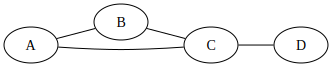

In [26]:
g = Graph(engine='dot')  
g.attr(rankdir='LR') 

added_edges = set()
for node, neighbors in adj_dict.items():
    for neighbor in neighbors:
        edge = tuple(sorted([node, neighbor]))
        if edge not in added_edges:
            g.edge(*edge)
            added_edges.add(edge)

g

Graphes pondérés

In [ ]:
adj_list_indexed = [
    [("B", 4), ("C", 2)],     # A
    [("A", 4), ("C", 5)],     # B
    [("A", 2), ("B", 5), ("D", 3)],  # C
    [("C", 3)]                # D
]


adj_dict = {
    'A': [('B', 4), ('C', 2)],
    'B': [('A', 4), ('C', 5)],
    'C': [('A', 2), ('B', 5), ('D', 3)],
    'D': [('C', 3)]
}

adj_matrix = np.array([
    [0, 4, 2, 0],  # A
    [4, 0, 5, 0],  # B
    [2, 5, 0, 3],  # C
    [0, 0, 3, 0]   # D
])

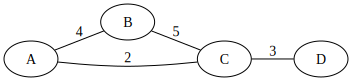

In [27]:
adj_dict = {
    'A': [('B', 4), ('C', 2)],
    'B': [('A', 4), ('C', 5)],
    'C': [('A', 2), ('B', 5), ('D', 3)],
    'D': [('C', 3)]
}

g = Graph(engine='dot')
g.attr(rankdir='LR')  # orientation horizontale

added_edges = set()
for node, neighbors in adj_dict.items():
    for neighbor, weight in neighbors:
        edge = tuple(sorted([node, neighbor]))
        if edge not in added_edges:
            g.edge(node, neighbor, label=str(weight))
            added_edges.add(edge)

g

### Algorithme de Dijkstra

L’algorithme de Dijkstra permet de déterminer la distance minimale entre un sommet de départ et tous les autres sommets d’un graphe.

- Il s’applique uniquement aux graphes pondérés dont les poids des arêtes sont positifs.

- Le but est de trouver le plus court chemin (en termes de poids total) depuis un sommet donné vers tous les autres sommets atteignables.

- À chaque étape, l’algorithme explore le chemin le plus prometteur en actualisant les distances minimales.

In [30]:
def dijkstra(graphe, depart):
    # Liste des sommets dont la distance minimale est déjà connue
    deja_affectes = [] 

    # Dictionnaire des distances minimales depuis le sommet de départ
    distances = {depart: 0} 

    # Dictionnaire des prédécesseurs pour reconstituer les chemins
    predecesseurs = {depart: None}

    # Liste des sommets à explorer, sous forme de (distance, sommet)
    a_traiter = [(0, depart)]

    while a_traiter:
        # Extraire le sommet ayant la plus petite distance connue
        distance, sommet = a_traiter.pop(0)

        # Si ce sommet a déjà été traité, on le saute
        if sommet in deja_affectes:
            continue

        # On marque le sommet comme traité
        deja_affectes.append(sommet)

        # Parcourir tous les voisins du sommet actuel
        for dist_successeur, successeur in graphe[sommet]:
            # Ignorer les sommets déjà traités
            if successeur in deja_affectes:
                continue

            # Calculer la nouvelle distance pour atteindre ce voisin
            nouvelle_distance = distance + dist_successeur

            # Si on n’a jamais atteint ce voisin, ou si on trouve un chemin plus court
            if (successeur not in distances) or (nouvelle_distance < distances[successeur]):
                # On met à jour la distance minimale
                distances[successeur] = nouvelle_distance

                # On note le sommet actuel comme prédécesseur du voisin
                predecesseurs[successeur] = sommet

                # On ajoute ce voisin à la liste des sommets à explorer
                a_traiter.append((nouvelle_distance, successeur))

        # On trie la liste pour toujours explorer en priorité le sommet le plus proche
        a_traiter.sort(key=lambda x: x[0])

    # On retourne le dictionnaire des distances et des prédécesseurs
    return distances, predecesseurs


In [31]:
def chemin(predecesseurs, depart, arrivee):
    solution = []

    while arrivee != depart:
        solution.append(arrivee)
        arrivee = predecesseurs[arrivee]

    solution.append(depart)
    solution.reverse()

    return solution

Exemple

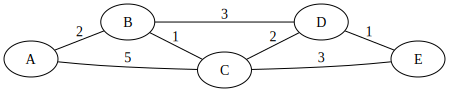

In [28]:
graphe = {
    'A': [(2, 'B'), (5, 'C')],
    'B': [(2, 'A'), (1, 'C'), (3, 'D')],
    'C': [(5, 'A'), (1, 'B'), (2, 'D'), (3, 'E')],
    'D': [(3, 'B'), (2, 'C'), (1, 'E')],
    'E': [(3, 'C'), (1, 'D')]
}

g = Graph()

g.attr(rankdir='LR')


for sommet in graphe:
    g.node(sommet)

ajoutes = set()

for u in graphe:
    for poids, v in graphe[u]:
        if (v, u) not in ajoutes:
            g.edge(u, v, label=str(poids))
            ajoutes.add((u, v))

g

Détermination des distances et plus courts chemins

In [33]:
distances, predecesseurs = dijkstra(graphe, 'A')

print("Distances depuis A :")
for sommet, d in distances.items():
    print(f"A → {sommet} = {d}")


chemin(predecesseurs, 'A', 'E')

Distances depuis A :
A → A = 0
A → B = 2
A → C = 3
A → D = 5
A → E = 6


['A', 'B', 'C', 'E']